# Week 6: Applied Supervised Learning 

### First Case: Classifying Iris Species

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

As a start, we will explore a basic machine learning problem and create our first model. In the process, we will revist some core concepts and terms. For the sake of this particular case we would like to classify species of different iris flowers. We have collected some measurements associated with each iris: the length and width of the petals and the length and width of the sepals, all measured in centimeters(figure 1-2). We also have the measurements of some irises that have been previously identified by an expert botanist as belonging to the species setosa, versicolor, or virginica. For these measurements, we can be certain of which species each iris belongs to. Our goal is to build a machine learning model that can learn from the measurements of these irises whose species is known, so that we can predict the species for a new iris.

Müller, Andreas C.. Introduction to Machine Learning with Python . O'Reilly Media. Kindle Edition. 

![sepal_petal](sepal.png)

The data we need to explore this case is built-in __sklearn__ the machine learning package for python. We will first import that package then load the data as per below.

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

When we call the data set iris_dataset to see what is in we got the messy content below

In [3]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris_dataset['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [5]:
type(iris_dataset)

sklearn.utils.Bunch

In [6]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris_dataset['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
type(iris_dataset['data'])

numpy.ndarray

#### Meeting the Data

sklearn.utils.Bunch is data structure that is particular for sklearn could also be stored in a DataFrame as per below line of code which is handy since we are PANDAS experts.

In [9]:
dataset = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']],
                     columns= iris_dataset['feature_names'] + ['target'])

In [10]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


#### Measuring Success: Training and Testing Data

Next step would be to split the data between training and testing sets. There is a build sklearn module that does this for us.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

the train_test_split function randomly split the data into a training set and a testing set. If we dont specify the split will be done on 75% (training) and 25%(test) 

In the case about we decided to set the random state to 0. This is similar to setting a seed when dealing with python's random functions. We do that in this particular case in order for all of us to have the same output.

In [12]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [13]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


#### Examining the Data 

<IPython.core.display.Javascript object>


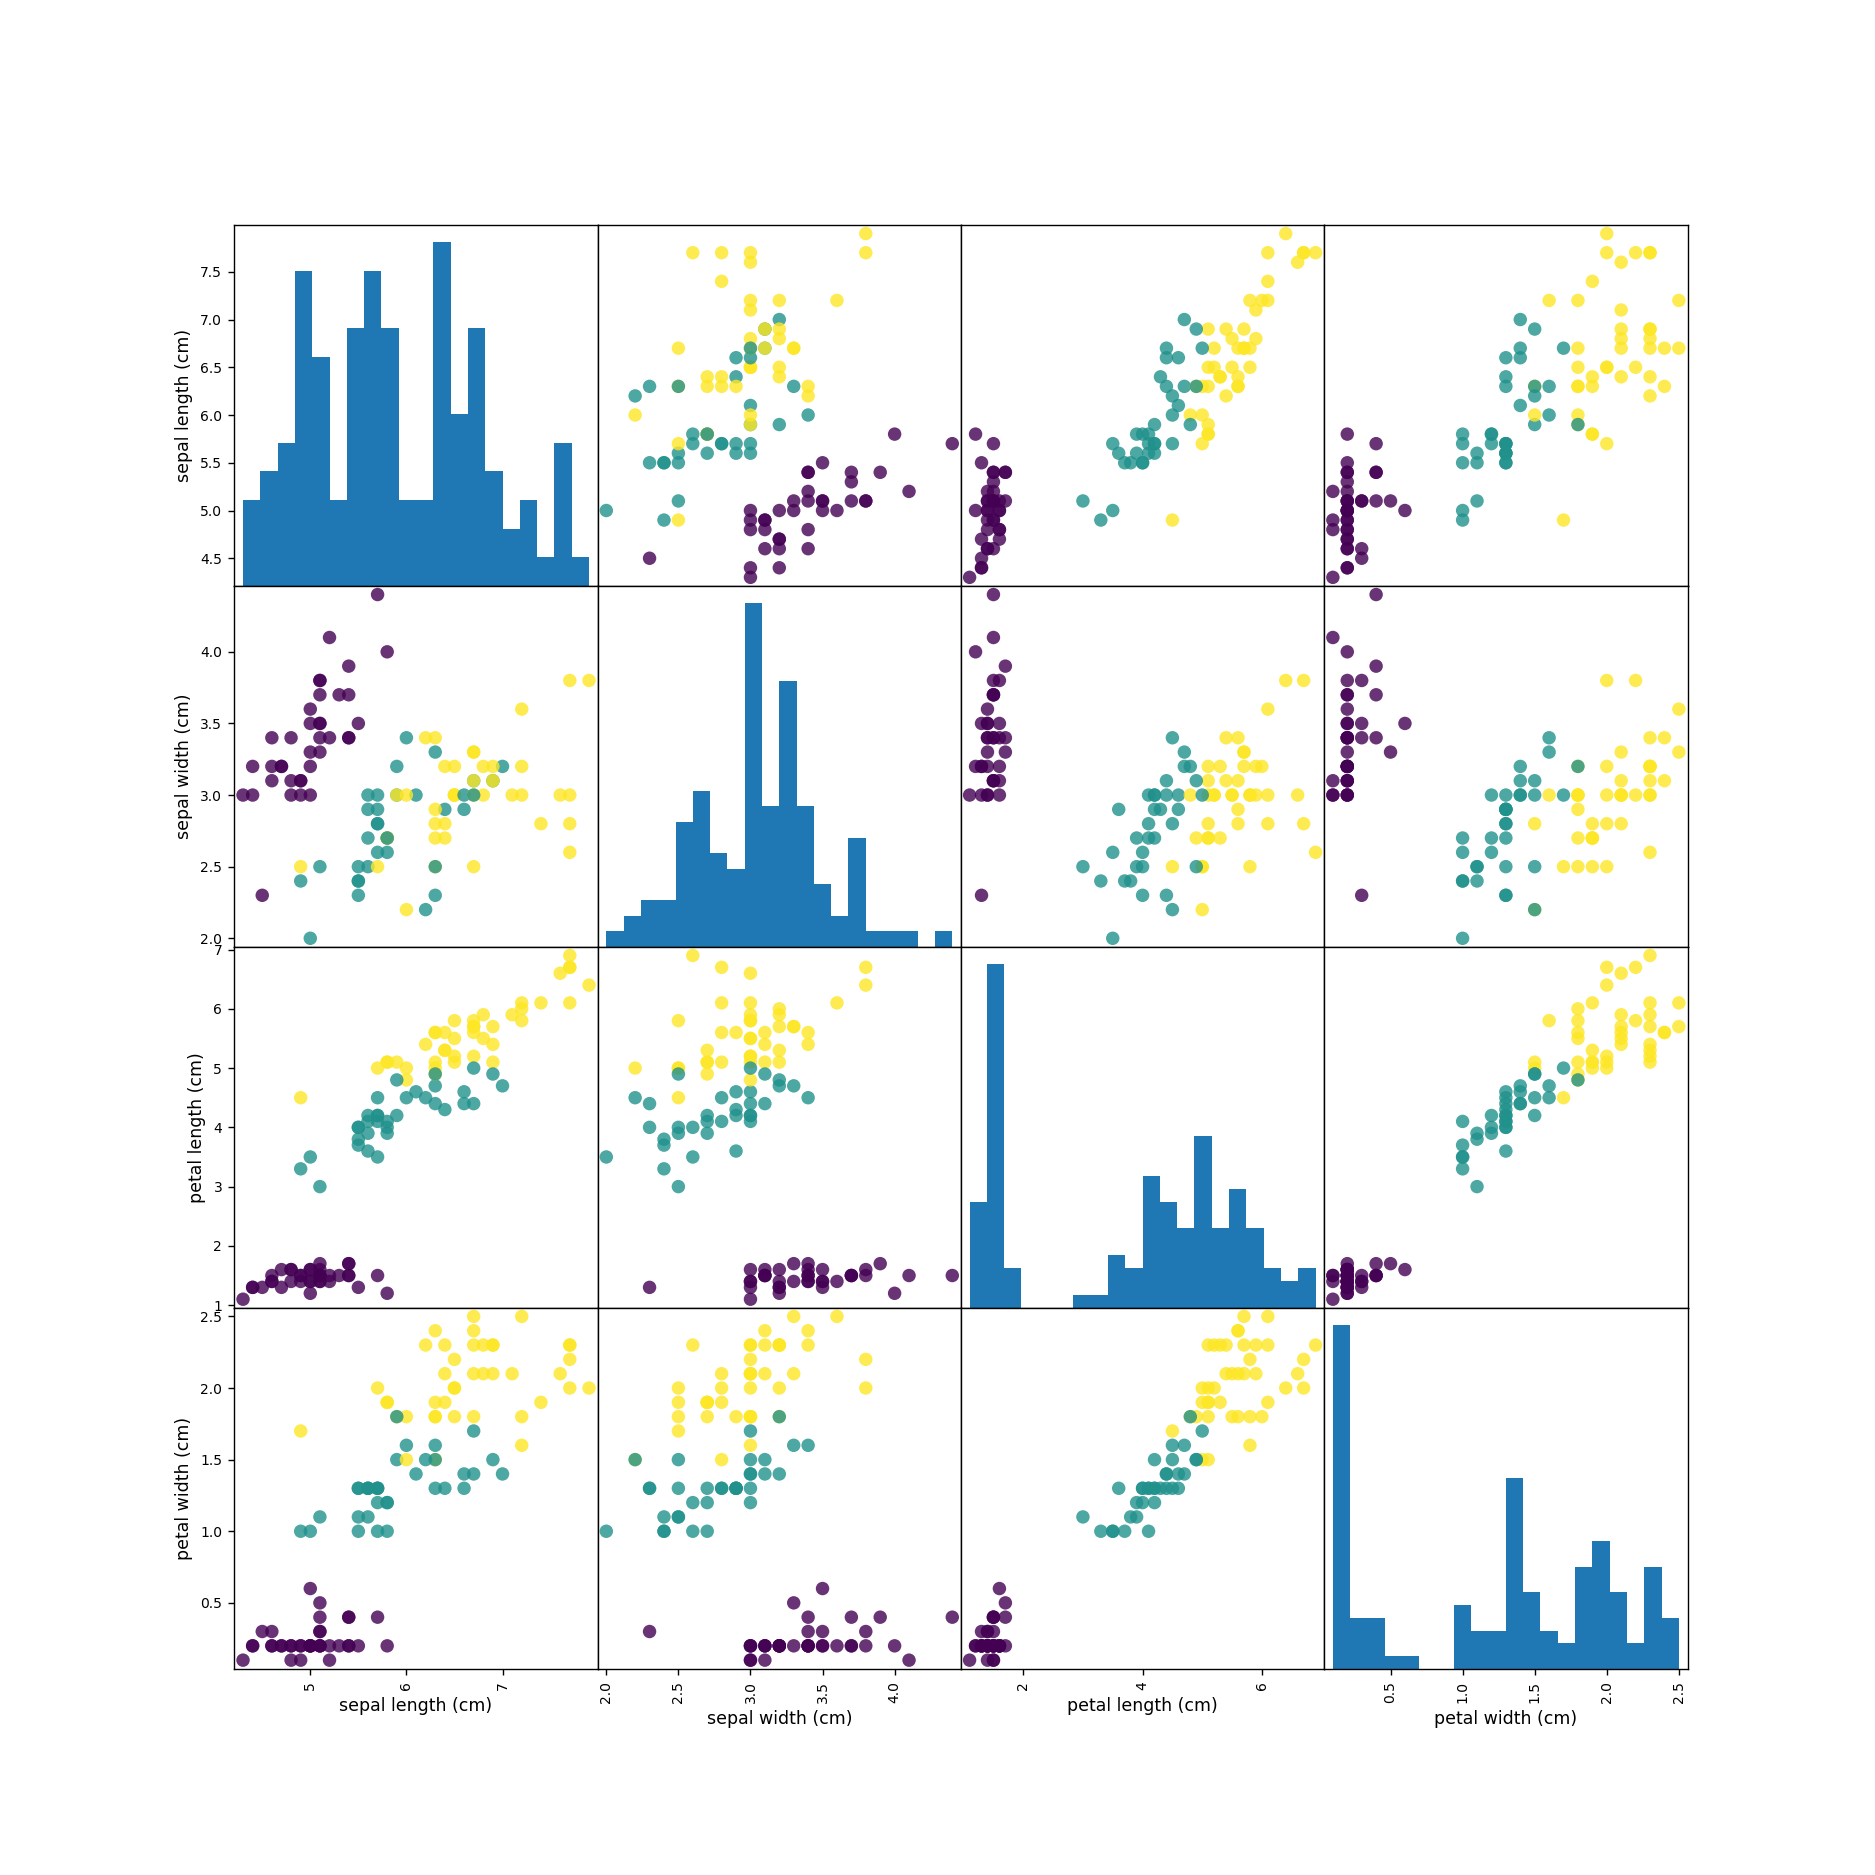

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb04730e850>,
      dtype=object)

In [14]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)

<IPython.core.display.Javascript object>


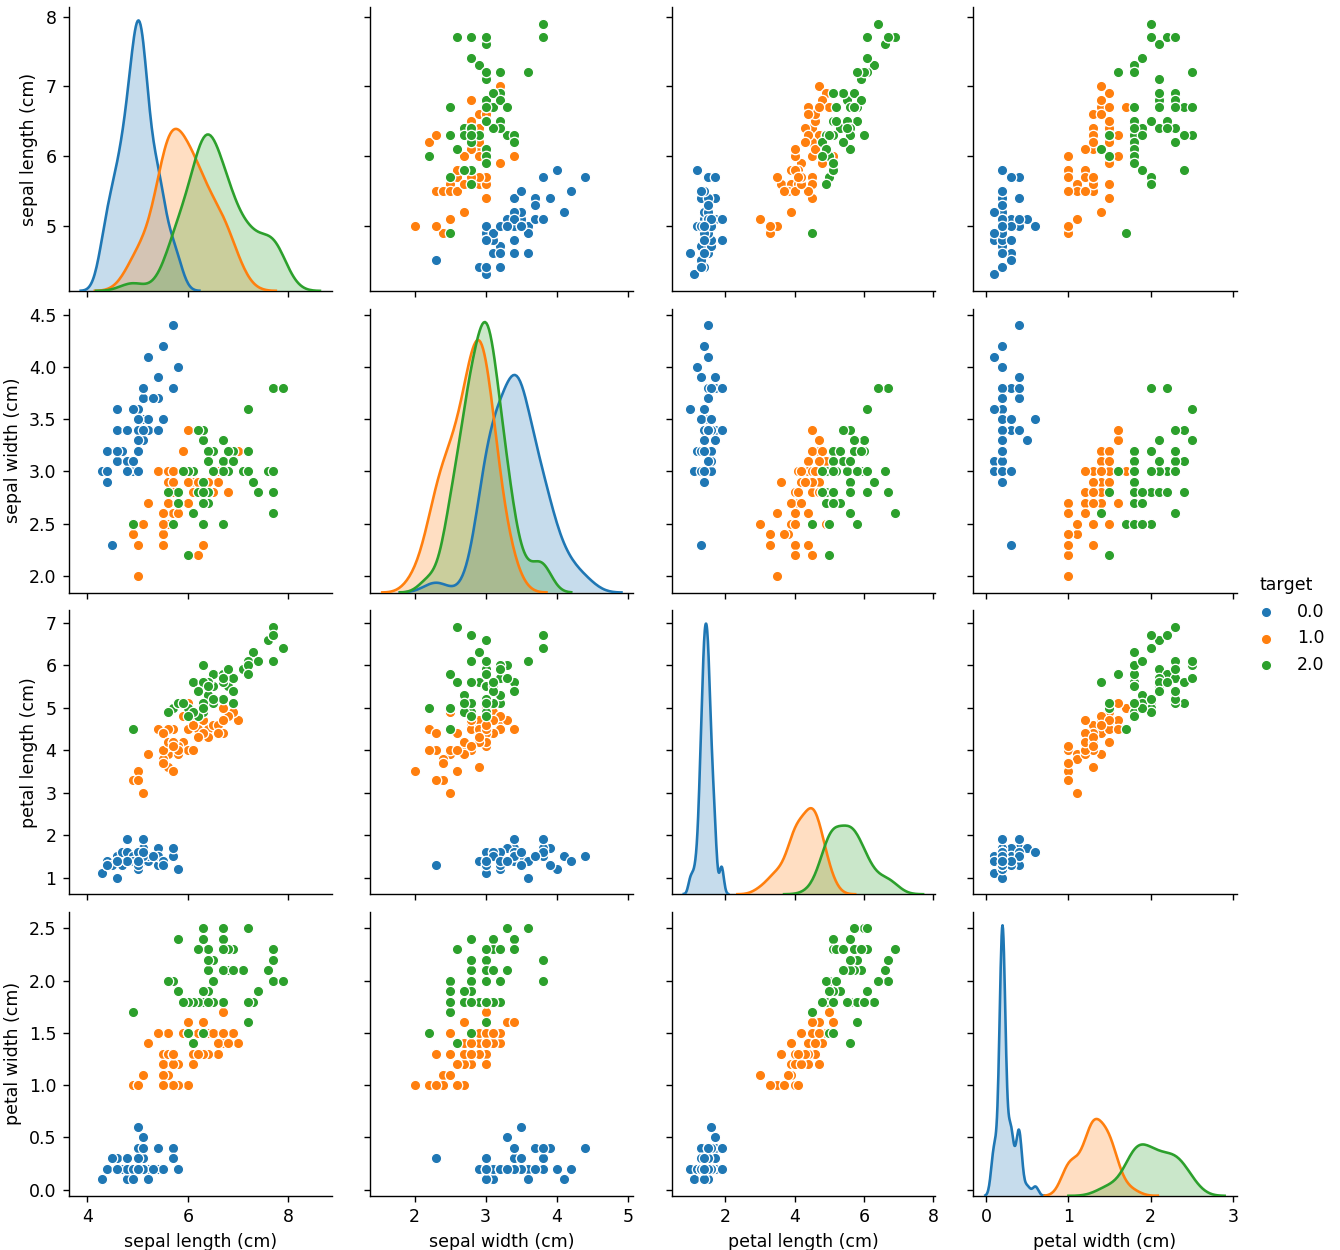

In [15]:
import seaborn as sns
sns.pairplot(dataset, hue ='target')

#### Building Your First Model: k-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

#### Make a prediction

In [18]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [ ]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

#### Evaluating the Model

To evaluate the model we look at the performance of the model on the test data that we split out earlier. We use our model to predict the type of Iris based on the feature of the test split. Then we compare the output with the real values of the target variable. Then we calculate the percentage of the the correct predictions.

In [ ]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

In [ ]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

We can also use the build-in method in sklearn.knn to calculate the score of the model. Again the closer to one the better is the score. We expect the same number as the one we calculated manually earlier.

In [ ]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

### How sensitive is k-NN classification accuracy to the train/test split proportion?

In the following code we try to understand the impact of the train-test split on the quality of the model.

In [ ]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 1)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

### Second Case: Classifying Fruits

Similarly to the earlier problem, we build a model that predicts the type of the fruit given 3 measurement features and one color feature

In [ ]:
fruits = pd.read_table('fruit_data_with_colors.txt')

In [ ]:
fruits.head()

In [ ]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

In [ ]:
from matplotlib import cm
from sklearn.model_selection import train_test_split
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

In [ ]:
sns.pairplot(fruits,hue='fruit_name')

In [ ]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [ ]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In this particular example we look at the performance of the model given the value k. We vay k from 1 to 20 and calculate the score of the model

In [ ]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

## Regressions

### Linear Regressions

We start by generating a synthetic data set using the built-in simulator of sklearn

In [ ]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias =250.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=60)
plt.show()

After spliting the data into a training set and test set. We then try to fit a linear regression 

In [ ]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

We then Plot the regression line as below:

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Real data regression with crime data:

In [ ]:
crime = pd.read_table('CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
# remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
crime = crime.iloc[:,columns_to_keep].dropna()

X_crime = crime.iloc[:,range(0,88)]
y_crime = crime['ViolentCrimesPerPop']

In [ ]:
X_crime.head()

In [ ]:
X_crime.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

As you can see from the results of R-squared the score is not great especially for the test data.
Let's try another algorithm.

#### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Using ridge we notice that the performance does not improve at all and the number of features remains 88. Did we forget to do something?

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#As we saw in week 2, in order to improve the peformance ridge and lasso regressions we need to scale features.
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

We could see that after scalling our features the $R^2$ of the test split improves and comes closer to the score of the training set.

Next we are intrested to see how does alpha impact our model. Hence we run an iteration varying alpha from 0 to 200.

In [ ]:
alphas = [0, 1, 10, 20, 50, 100, 200]
r2_train_l =[]
r2_test_l =[]
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in alphas:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_train_l.append(r2_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    r2_test_l.append(r2_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))



In [ ]:
plt.figure
plt.plot(alphas,r2_test_l,label="Testing Performance")
plt.plot(alphas,r2_train_l,label="Training Performance")
plt.xlabel("Alpha =")
plt.ylabel("$R^2$ =")
plt.legend()
plt.show()

### Lasso Regression

Can we improve the performance of the model by implementing a Lasso regression?

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

In [ ]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

## Factor Model for Asset Pricing

Factors models are reliably used in investement business and serve two main purposes.

The first they reduce the complexity of modeling asset price movements.  For instance, trying to build a model that completely explains stock price movements is near impossible.  In order to build a model for your portfolio one would need to model supply, demand, sentiment, current and expected future earnings of the stock, news, interest rates, risk premia...

It's near impossible to calibrate such a complicated model!  Instead, factor investors assume that there are N important factors that drive a portion of the asset returns.  They then say that at the portfolio level, asset specific movements can be averaged out, and only those N variables remain.  So to understand what drives the portfolio returns we only need to model the effect of that small number of factors.

Alternativly, understanding the factor loadings of the individual assets allows us to estimate the covariance of our returns.  If one understands the factor loadings and the covariance of the factor returns, one can then compute an estimate for the covariance of the assets themselves.

Finally factor models can also be used for hedging.  The factor loadings represent the hedging ratio one would use to minimize the volatility of your portfolio.

In this module we will walk though multiple ways of estimating factor loadings, and discuss their relative strenghts and weaknesses.

If $y_t$ represent an asset return at time t, the linear factor model can help us interpret the source of the asset return and attribute it to the factor returns.

In this example, we are interested in explaining the asset returns with a five-factor model:

1) World Equity: This factor represents worldwide equity returns.

2) US Treasury: This factor contains return from treasury bonds in United States, the bonds with the least risk.

3) Bond Risk Premia: This is a credit factor that captures extra yield from risky bonds.  Defined as the spread between high risk bonds and US Treasury bonds.

4) Inflation Protection: This is a "style" factor that considers the difference between real and nominal returns, thus balances the need for both.

5) Currency Protection: This is also a "style" factor that includes risk premium for US domestic assets.

### Load and Examine the Data

In [ ]:


all_data = pd.read_csv("data_oct2018.csv")
all_data.head()

In [ ]:
all_data['Date'] = pd.to_datetime(all_data['Date'])
names = ["Real Estate"]

In [ ]:

n = all_data.shape[0]
totalReturns = np.zeros((n,len(names)))
totalReturns[0,:] = 1.
for i in range(1,n):
    totalReturns[i,:] = np.multiply(totalReturns[i-1,:], (1+all_data[names].values[i,:]))
for j in range(len(names)):
    plt.semilogy(all_data['Date'], totalReturns[:,j])

plt.title('Total Return Over Time')
plt.ylabel('Total Return')
plt.legend(names)
plt.xlabel('Date')
plt.show()

Then we examine the worst dates

In [ ]:
all_data.sort_values('US Equities').head(3)

October 1987 was black monday and October / November 2008 was the beginnings of the financial crisis

In [ ]:
from sklearn.linear_model import LinearRegression
ind_var=['World Equities','US Treasuries','Bond Risk Premium','Inflation Protection','Currency Protection']
dep_var='Real Estate'
X_fm = all_data[ind_var]
y_fm = all_data[dep_var]
linreg_FM = LinearRegression().fit(X_fm, y_fm)

In [ ]:
coef = linreg_FM.coef_
for i in range(len(coef)):
    print ( '{}, has a coefficient of {}'.format(ind_var[i],coef[i]))
print('linear model intercept (b): {:.3f}'
     .format(linreg_FM.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg_FM.score(X_fm, y_fm)))


#### OLS Drawbacks

OLS has major drawbacks.  First, OLS has no mechanism to filter out noise variables.  Second, it assumes that factor loadings are constant over time. In practice, you will generally have many variables that you would like to filter down.  Moreover, the assumption that the factor loadings are constant over time is restrictive, and not true.  In fact, we will show that factor loadings are highly dependent on the time period.

In this section we give example of the two drawbacks.  In section 3, we will introduce ways of filtering noise variables.

To demonstrate how OLS can be susceptible to noise, we introduce a noise variable positivly correlated with the World Equities factor.  Then we re-run the OLS regression. The OLS regression chosses to average the two signals, changing the loading on the World Equity factor.

In [ ]:
#Calculate a noise variable
std = all_data['World Equities'].std()*(2)
nPeriods = all_data.shape[0]
np.random.seed(1235)
noise = np.random.normal(loc=0, size=(nPeriods))
noise = np.reshape(std*noise + np.array(all_data['World Equities']), (nPeriods,1))
all_data['Noise'] = noise
factorNameWithNoise = ['World Equities','US Treasuries','Bond Risk Premium','Inflation Protection','Currency Protection'] + ['Noise']

In [ ]:
std

In [ ]:

ind_var=factorNameWithNoise 
dep_var='Real Estate'
X_fm = all_data[ind_var]
y_fm = all_data[dep_var]
linreg_FM = LinearRegression().fit(X_fm, y_fm)

coef = linreg_FM.coef_
for i in range(len(coef)):
    print ( '{}, has a coefficient of {}'.format(ind_var[i],coef[i]))
print('linear model intercept (b): {:.3f}'
     .format(linreg_FM.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg_FM.score(X_fm, y_fm)))

Notice that the sum of World Equities Beta + Noise Beta is around .31.  Feel free to re-run the previous 2 code blocks.  It will generate a new noise term, and notice that each time the noise term will then effects the World Equities loading.  That noise term is directly causing estimation error in the true loading (Beta value) of the World Equity factor.
To demonstrate the second drawback we will show that the OLS estimator depends greatly on the time period.  First, we will pick different time periods and run the OLS regression.  We'll show that the factor loadings can change dramatically depending on the time period.  To formalize this idea, we will filter our data into two different regimes.  The first regime "normal", will be months where US Equities had a positive monthly return.  The second, "crash" will be months where US Equities had a negative return.  These are crude approximations, but even with this crude definition we will return substantially different factor loadings.



In [ ]:
normalData = all_data[all_data['US Equities'] > 0].copy()
ind_var=['World Equities','US Treasuries','Bond Risk Premium','Inflation Protection','Currency Protection']
dep_var='Real Estate'
X_fm = normalData[ind_var]
y_fm = normalData[dep_var]
linreg_FM = LinearRegression().fit(X_fm, y_fm)

coef = linreg_FM.coef_
for i in range(len(coef)):
    print ( '{}, has a coefficient of {}'.format(ind_var[i],coef[i]))
print('linear model intercept (b): {:.3f}'
     .format(linreg_FM.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg_FM.score(X_fm, y_fm)))

In [ ]:
crashData = all_data[all_data['US Equities'] <= 0].copy()
ind_var=['World Equities','US Treasuries','Bond Risk Premium','Inflation Protection','Currency Protection']
dep_var='Real Estate'
X_fm = crashData[ind_var]
y_fm = crashData[dep_var]
linreg_FM = LinearRegression().fit(X_fm, y_fm)

coef = linreg_FM.coef_
for i in range(len(coef)):
    print ( '{}, has a coefficient of {}'.format(ind_var[i],coef[i]))
print('linear model intercept (b): {:.3f}'
     .format(linreg_FM.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg_FM.score(X_fm, y_fm)))

Even with a crude definition of a "crash" regime we have isolated different factor loadings.  Notice that during normal periods the loading on Currency Protection is close to zero, but during crash periods is 10x larger!

### Factor Model with Lasso

In [ ]:
from sklearn.linear_model import Lasso
ind_var=['World Equities','US Treasuries','Bond Risk Premium','Inflation Protection','Currency Protection']
dep_var='Real Estate'
X_fm = all_data[ind_var]
y_fm = all_data[dep_var]


In [ ]:
linlasso_FM = Lasso(alpha=(0.0001),fit_intercept=True).fit(X_fm, y_fm)

In [ ]:

coef = linlasso_FM.coef_
for i in range(len(coef)):
    print ( '{}, has a coefficient of {}'.format(ind_var[i],coef[i]))
print('linear model intercept (b): {:.3f}'
     .format(linlasso_FM.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linlasso_FM.score(X_fm, y_fm)))

Let's add noise:

In [ ]:
ind_var=factorNameWithNoise 
dep_var='Real Estate'
X_fm = all_data[ind_var]
y_fm = all_data[dep_var]
linlasso_FM = Lasso(alpha=(0.0002),fit_intercept=True).fit(X_fm, y_fm)

coef = linlasso_FM.coef_
for i in range(len(coef)):
    print ( '{}, has a coefficient of {}'.format(ind_var[i],coef[i]))
print('linear model intercept (b): {:.3f}'
     .format(linlasso_FM.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linlasso_FM.score(X_fm, y_fm)))
